In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:\Santhosh\AIML\Github\Machine-Learning\KNN\diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
features = data.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
features_zeros = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
#Pregnancies -- can be 0 but other values can't be zero --- they are missing values

features_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

In [8]:
data[features_zeros] = data[features_zeros].replace(0, np.nan)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E62B81668>,
      dtype=object)

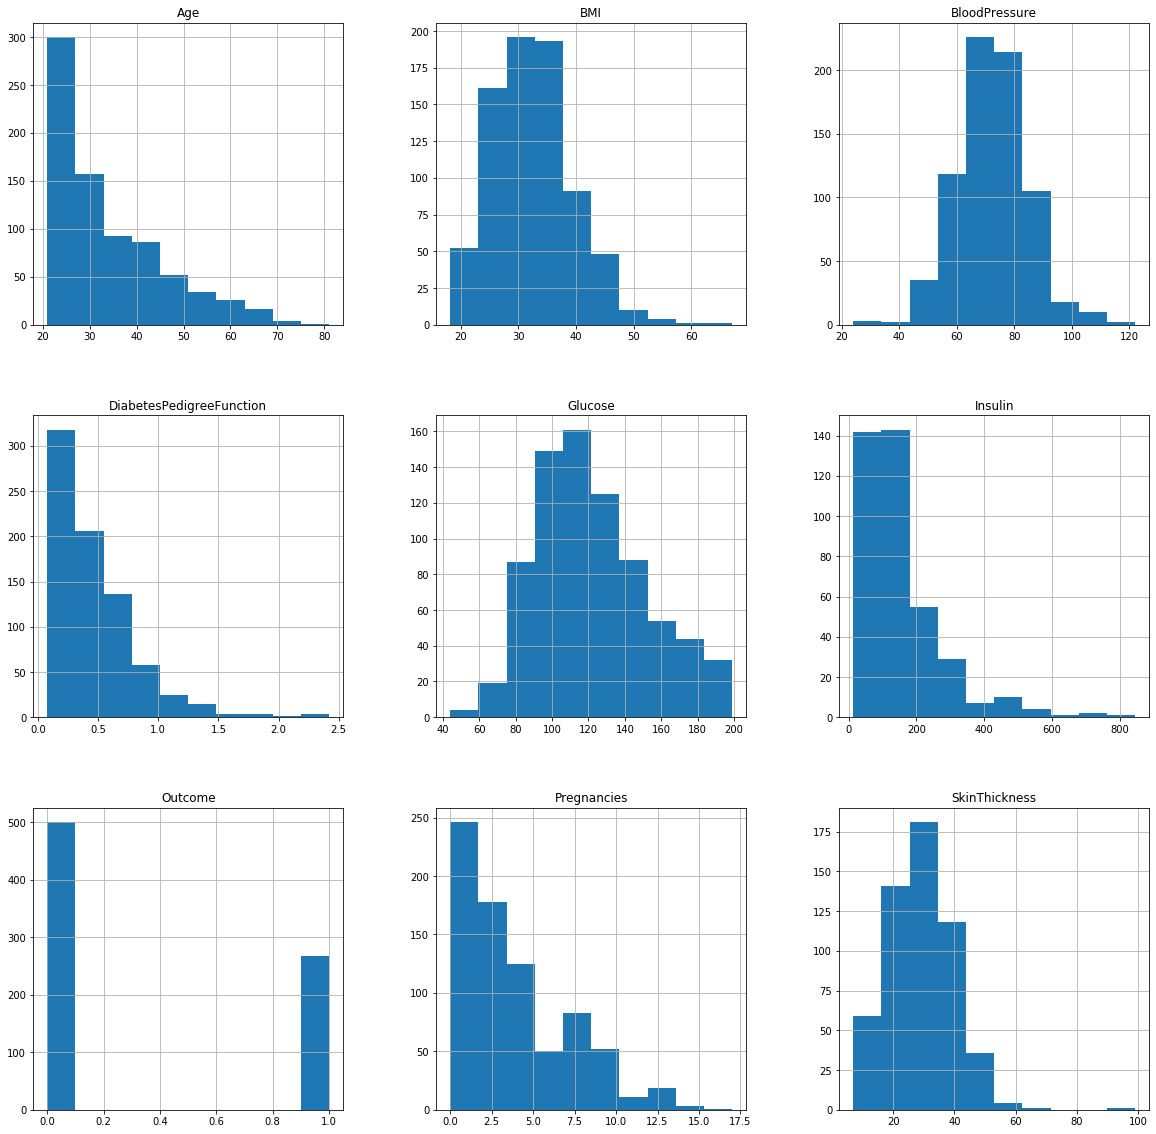

In [11]:
# Replace nan by looking into data distributions
data.hist(figsize = (20,20))

In [12]:
# replace with Mean or Meadian
features_zeros

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [13]:
# Replacing with median as data distribution is either left or right Skewed
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [14]:
# Replacing with mean as data looks normal distribution
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E657FA588>,
      dtype=object)

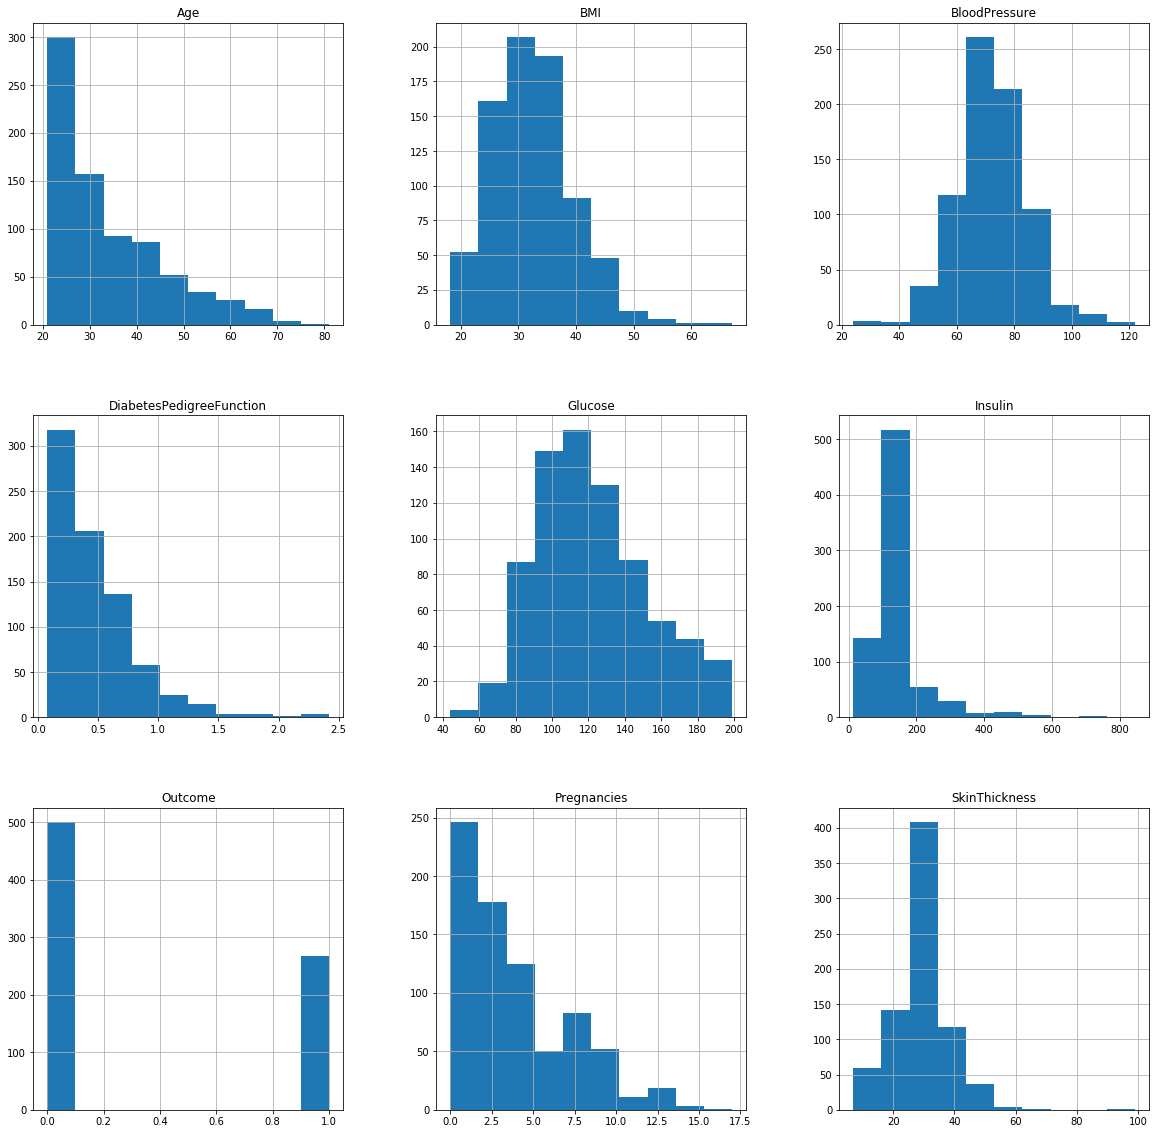

In [15]:
data.hist(figsize = (20,20))

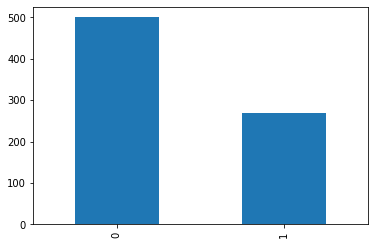

In [16]:
data['Outcome'].value_counts().plot(kind='bar')

In [17]:
print('Outcome 1 - ', data['Outcome'][data['Outcome']==1].count())
print('Outcome 0 - ', data['Outcome'][data['Outcome']==0].count())
print('Count - ', data['Outcome'].count())

Outcome 1 -  268
Outcome 0 -  500
Count -  768


In [18]:
# Data is more biased towards outcome 1
# split the data either using manual split -- 80% outcome(1) and 80% outcome(0)

In [19]:
data[data.Outcome==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
10,4,110.0,92.000000,29.0,125.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.000000,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.000000,23.0,112.0,26.2,0.245,30,0


In [20]:
outcome_1 = data[data['Outcome']==1]
outcome_0 = data[data['Outcome']==0]
train_1 = outcome_1.sample(frac=0.8)
train_0 = outcome_0.sample(frac=0.8)
train = pd.concat([train_1, train_0], axis =0)

In [21]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
179,5,130.0,82.0,29.0,125.0,39.1,0.956,37,1
143,10,108.0,66.0,29.0,125.0,32.4,0.272,42,1
675,6,195.0,70.0,29.0,125.0,30.9,0.328,31,1
338,9,152.0,78.0,34.0,171.0,34.2,0.893,33,1
209,7,184.0,84.0,33.0,125.0,35.5,0.355,41,1


In [22]:
test = data.loc[~data.index.isin(train.index)]

In [23]:
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
12,10,139.0,80.0,29.0,125.0,27.1,1.441,57,0
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
17,7,107.0,74.0,29.0,125.0,29.6,0.254,31,1


In [24]:
X_train = train.drop(['Outcome'], axis =1)
Y_train = train['Outcome']
X_test = test.drop(['Outcome'], axis =1)
Y_test = test['Outcome']

In [25]:
features = X_train.columns

In [26]:
#scale the data -- standard scaling
for feature in features:
    mean = X_train[feature].mean()
    std = X_train[feature].std()
    X_train[feature] = (X_train[feature] - mean)/std
    X_test[feature] = (X_test[feature] -mean)/std
    
    

In [27]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
179,0.324099,0.259602,0.767898,-0.034261,-0.206152,0.961364,1.559378,0.313844
143,1.800338,-0.466084,-0.529388,-0.034261,-0.206152,-0.036708,-0.622158,0.745520
675,0.619347,2.403674,-0.205067,-0.034261,-0.206152,-0.260156,-0.443552,-0.204167
338,1.505090,0.985288,0.443577,0.543661,0.348271,0.231431,1.358447,-0.031497
209,0.914595,2.040831,0.930059,0.428077,-0.206152,0.425086,-0.357439,0.659185


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

cnf_matrx_list = []

test_scores = []
train_scores = []
for i in range(3,10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))
    Y_hat = knn.predict(X_test)
    cnf_matrx_list.append(confusion_matrix(Y_test,Y_hat))

In [30]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,Y_test))

c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [230]:
from sklearn.metrics import roc_curve,auc
# y_scores or predict_prob gives probabilities for each class -- here 0,1 --> probability for 0, probability for 1
y_scores = knn.predict_proba(X_test)[:,1]
y_hat = knn.predict(X_test)
knn.score(X_test, y_hat)
# j=0;
# for i in y_scores:
#     print(i, '---->', y_hat[j])
#     j=j+1
# y_scores[:, 1] --> probabilities for class 1
fpr, tpr, threshold = roc_curve(Y_test, y_scores)
y_pred = np.where(y_scores > 0.6, 1, 0)
for i in threshold:
    y_hat = np.where(y_scores > i, 1, 0)
    cnfm = confusion_matrix(Y_test,y_hat)
    

# print(Y_test.shape)
# print('fpr', fpr.shape)
# print('tpr', tpr.shape)
# print('Threshold', threshold.shape)
# print(y_pred)
roc_auc = auc(fpr, tpr)

In [231]:
#From above thresholds --> 0,5714 would be ideal threshold

In [232]:
y_pred = np.where(y_scores > 0.57, 1, 0)
print(confusion_matrix(Y_test,y_pred))

[[90 10]
 [24 30]]


In [233]:
y_train_scores = knn.predict_proba(X_train)[:,1]

In [248]:
y_train_hat = np.where(y_train_scores >  0.5, 1,0)

In [249]:
cnfm = confusion_matrix(Y_train, y_train_hat)
print(cnfm)

[[349  51]
 [ 72 142]]


In [236]:
y_train_from_knn = knn.predict(X_train)

In [237]:
cnfm = confusion_matrix(Y_train, y_train_from_knn)
print(cnfm)
print(cnfm[0,0]+cnfm[1,1])

[[349  51]
 [ 72 142]]
491


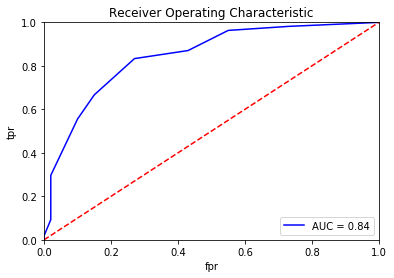

In [238]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()

In [239]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 83.71335504885994 % and k = [1]


In [240]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.57142857142857 % and k = [6, 7]


In [241]:
# print(test_scores)

In [242]:
# plt.figure(figsize=(12,5))
# sns.lineplot(range(3,100), train_scores)
# sns.lineplot(range(3,100), test_scores)

In [243]:
#conside k = 35

In [244]:
knn = KNeighborsClassifier(35)

In [245]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [246]:
print('Train score for K-35 :', knn.score(X_train, Y_train)*100)
print('Train score for K-35 :',knn.score(X_test, Y_test)*100)

Train score for K-35 : 77.85016286644951
Train score for K-35 : 77.27272727272727


In [247]:
cnf_matrix

NameError: name 'cnf_matrix' is not defined

In [ ]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_hat))

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,Y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))